# 1.Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 2.Reading Dataset

In [2]:
data = pd.read_csv("./advertising.csv")

# 3.Analysing the Dataset

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
(data == 0).sum(axis=0)

TV           0
Radio        1
Newspaper    0
Sales        0
dtype: int64

the minimum value of radio is zero

# 4.Visualizing the data

<Axes: >

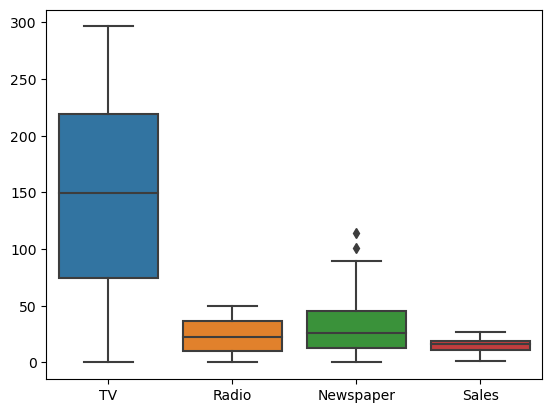

In [8]:
sns.boxplot(data)

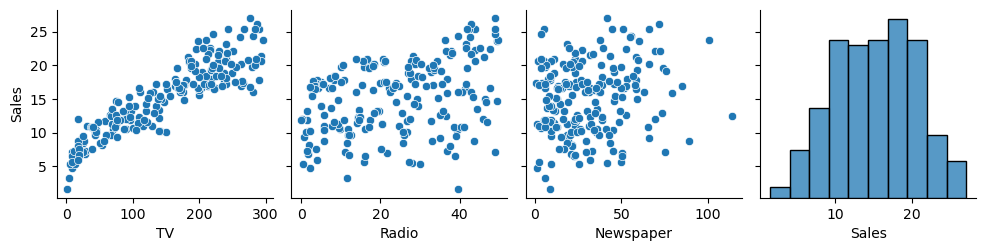

In [9]:
sns.pairplot(data=data,x_vars=['TV', 'Radio', 'Newspaper', 'Sales'] ,y_vars='Sales')


# 5.splitting the Data

In [10]:
X = data[['TV']].values
y = data.Sales   

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


In [12]:
y_train.head()

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
Name: Sales, dtype: float64

In [13]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: Sales, dtype: float64

# 6.Building model

In [14]:
lreg = LinearRegression()
lreg.fit(X, y)

LinearRegression()

In [15]:
# Predicting the test set results
y_pred = lreg.predict(X_test)
y_pred_train = lreg.predict(X_train)

In [16]:
lreg.coef_


array([0.05546477])

In [17]:
lreg.intercept_

6.9748214882298925

In [18]:
#MSE for testing set
mean_squared_error(y_test,y_pred)

6.090036979246393

In [19]:
#r squared for training set
r2_score(y_train,y_pred_train)

0.813440772394617

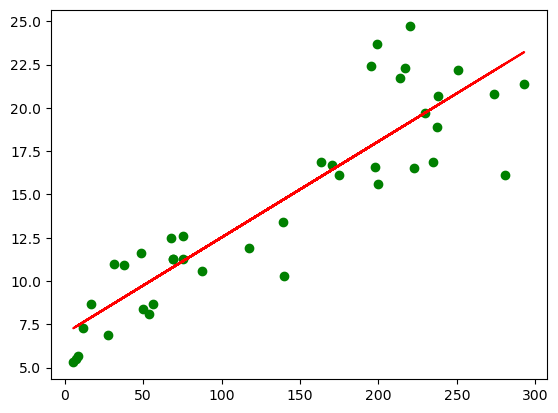

In [20]:
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test,y_pred , color ='r')
plt.show()